<a href="https://colab.research.google.com/github/pranavkantgaur/ML-course/blob/main/ml_x_dimensionality_reduction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Eigen value and Eigen vectors


## PCA
* Concepts:
  * The main idea behind this technique is to reduce the dimensionality of data that is highly correlated by transforming the original set of vectors to a new set which is known as Principal component.
  * Transformations: https://miro.medium.com/max/1400/1*LwmAwpNTGQ_a7n--n3LQpA.jpeg
  * Linear dimesnionality reduction technique
  * Methods of computing PCA:
    * Data matrix->Covariance matrix->Eigendecomposition->Extract primary components
    * Data matrix->SVD->Extract primary components
* Examples:
  * No. of rooms, carpet area, proximity to park(unrelated variable), prox. to bus station, prox. to train station(dependant on bus stat.), prox. to market, flat-price

In [1]:
import numpy as np
from sklearn.decomposition import PCA
import pandas as pd

In [2]:
X =  pd.read_csv('/content/car_evaluation.csv')

In [3]:
y_labels = X['decision'].unique()
y = X['decision']
#y = X['decision']
#y_unique_values = y.unique()
#print(X['decision'])

In [4]:
print(y)

0       unacc
1       unacc
2       unacc
3       unacc
4       unacc
        ...  
1723     good
1724    vgood
1725    unacc
1726     good
1727    vgood
Name: decision, Length: 1728, dtype: object


In [5]:
#X.head()
X = X.drop('decision', axis = 1)
X.head()

,buy_price,maintenance_cost,no_of_doors,no_of_persons,boot_space,safety
0,vhigh,vhigh,2,2,small,low
1,vhigh,vhigh,2,2,small,med
2,vhigh,vhigh,2,2,small,high
3,vhigh,vhigh,2,2,med,low
4,vhigh,vhigh,2,2,med,med


In [6]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
feature_list = X.columns
print(feature_list)
for feature in feature_list:
  feature_column = X[feature]
  le.fit(feature_column)
  print(le.classes_)
  X[feature] = le.transform(feature_column)

le.fit(y)
y = le.transform(y)

Index(['buy_price', 'maintenance_cost', 'no_of_doors', 'no_of_persons',
       'boot_space', 'safety'],
      dtype='object')
['high' 'low' 'med' 'vhigh']
['high' 'low' 'med' 'vhigh']
['2' '3' '4' '5more']
['2' '4' 'more']
['big' 'med' 'small']
['high' 'low' 'med']


In [7]:
le.fit(y)
y = le.transform(y)

In [8]:
print(np.unique(y))

[0 1 2 3]


In [9]:
pca = PCA(n_components=3)

In [10]:
pca.fit(X)
#PCA(n_components=2)
print(pca.explained_variance_ratio_)
print(pca.singular_values_)

[0.2173913 0.2173913 0.2173913]
[46.47580015 46.47580015 46.47580015]


In [11]:
X = pca.transform(X)

In [12]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [13]:
name_label = [(y, id) for id, y in enumerate(y)]
print(name_label)

[(2, 0), (2, 1), (2, 2), (2, 3), (2, 4), (2, 5), (2, 6), (2, 7), (2, 8), (2, 9), (2, 10), (2, 11), (2, 12), (2, 13), (2, 14), (2, 15), (2, 16), (2, 17), (2, 18), (2, 19), (2, 20), (2, 21), (2, 22), (2, 23), (2, 24), (2, 25), (2, 26), (2, 27), (2, 28), (2, 29), (2, 30), (2, 31), (2, 32), (2, 33), (2, 34), (2, 35), (2, 36), (2, 37), (2, 38), (2, 39), (2, 40), (2, 41), (2, 42), (2, 43), (2, 44), (2, 45), (2, 46), (2, 47), (2, 48), (2, 49), (2, 50), (2, 51), (2, 52), (2, 53), (2, 54), (2, 55), (2, 56), (2, 57), (2, 58), (2, 59), (2, 60), (2, 61), (2, 62), (2, 63), (2, 64), (2, 65), (2, 66), (2, 67), (2, 68), (2, 69), (2, 70), (2, 71), (2, 72), (2, 73), (2, 74), (2, 75), (2, 76), (2, 77), (2, 78), (2, 79), (2, 80), (2, 81), (2, 82), (2, 83), (2, 84), (2, 85), (2, 86), (2, 87), (2, 88), (2, 89), (2, 90), (2, 91), (2, 92), (2, 93), (2, 94), (2, 95), (2, 96), (2, 97), (2, 98), (2, 99), (2, 100), (2, 101), (2, 102), (2, 103), (2, 104), (2, 105), (2, 106), (2, 107), (2, 108), (2, 109), (2, 110),

[2 2 2 ... 2 1 3]


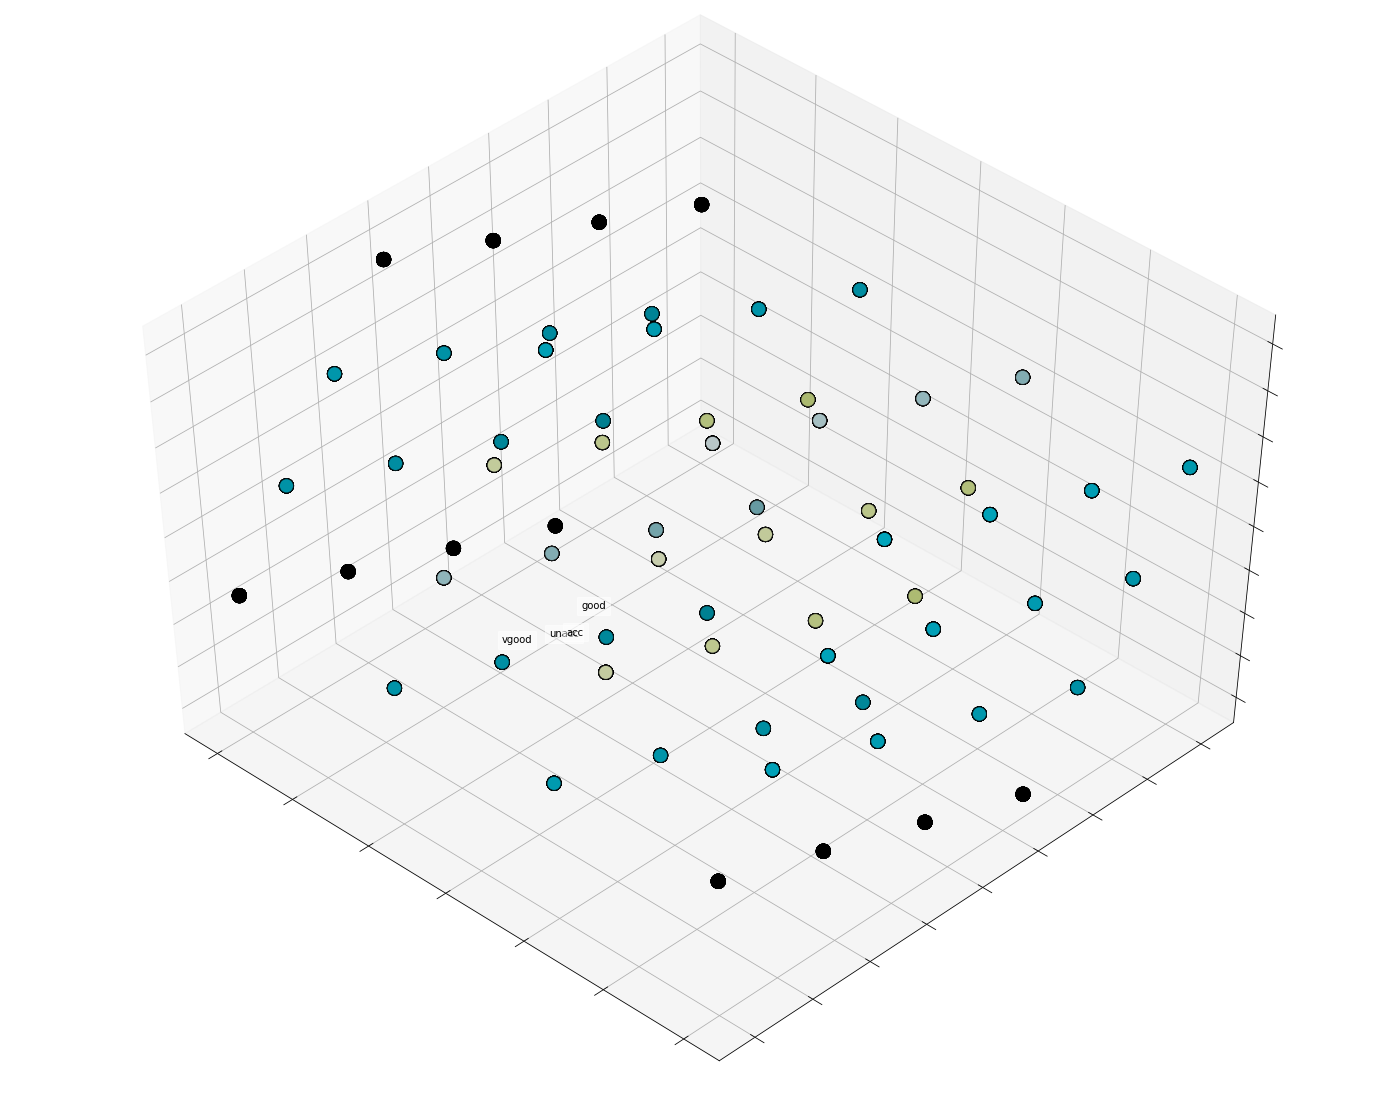

In [14]:
fig = plt.figure(1, figsize=(20, 15))
plt.clf()
ax = Axes3D(fig, rect=[0, 0, 0.95, 1], elev=48, azim=134)

plt.cla()
name_label = [(y_label, id) for id, y_label in enumerate(y_labels)]
for name, label in name_label:
    #print(X[y == label, 0])
    #print(X[0, 0])
    ax.text3D(        
        X[y == label, 0].mean(),
        X[y == label, 1].mean() + 1.5,
        X[y == label, 2].mean(),
        name,
        horizontalalignment="center",
        bbox=dict(alpha=0.5, edgecolor="w", facecolor="w"),
    )
# Reorder the labels to have colors matching the cluster results
print(y)
s=[200,400,600,100]
y = np.choose(y, [1, 2, 0, 3]).astype(float)
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=y, cmap=plt.cm.nipy_spectral, edgecolor="k", s=200)

ax.w_xaxis.set_ticklabels([])
ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([])

plt.show()




## t-distributed stochastic neighbor embedding(T-SNE)
* Data visualization using non-linear dimensionality reduction.
* Can create clusters for well-separated datasets
* While t-SNE plots often seem to display clusters, the visual clusters can be influenced strongly by the chosen parameterization and therefore a good understanding of the parameters for t-SNE is necessary. Such "clusters" can be shown to even appear in non-clustered data. https://stats.stackexchange.com/a/264647
* https://www.geeksforgeeks.org/difference-between-pca-vs-t-sne/

* Minimise relative rentropy(or KL divergence) by mapping n-D data to 2D/3D data representation.
* t-SNE creates a reduced feature space where similar samples are modeled by nearby points and dissimilar samples are modeled by distant points with high probability.
* KL divergence is the measure of similarity of one probobility distribution wrt. another.

In [21]:
#import numpy as np
from sklearn.datasets import load_digits
#from scipy.spatial.distance import pdist
#from sklearn.manifold.t_sne import _joint_probabilities
#from scipy import linalg
#from sklearn.metrics import pairwise_distances
#from scipy.spatial.distance import squareform
from sklearn.manifold import TSNE
from matplotlib import pyplot as plt
import seaborn as sns
sns.set(rc={'figure.figsize':(11.7,8.27)})
palette = sns.color_palette("bright", 4)

In [16]:
X =  pd.read_csv('/content/car_evaluation.csv')
X = X.drop('decision', axis = 1)
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
feature_list = X.columns
print(feature_list)
for feature in feature_list:
  feature_column = X[feature]
  le.fit(feature_column)
  print(le.classes_)
  X[feature] = le.transform(feature_column)


Index(['buy_price', 'maintenance_cost', 'no_of_doors', 'no_of_persons',
       'boot_space', 'safety'],
      dtype='object')
['high' 'low' 'med' 'vhigh']
['high' 'low' 'med' 'vhigh']
['2' '3' '4' '5more']
['2' '4' 'more']
['big' 'med' 'small']
['high' 'low' 'med']


In [23]:
tsne = TSNE(n_components = 3)
X_embedded = tsne.fit_transform(X)

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


In [24]:
sns.scatterplot(X_embedded[:,0], X_embedded[:,1], X_embedded[:,2], hue=y, legend='full', palette=palette)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y, hue. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


ValueError: ignored